# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

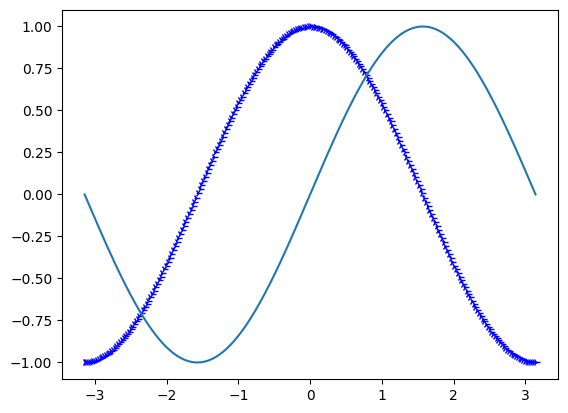

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
cos, sin = np.cos(x), np.sin(x)

plt.plot(x, cos)
plt.plot(x, sin)

plt.show()



# 主成分分析

PCA_1_ratio: 0.9246187232017341
PCA_2_ratio: 0.05306648311706383
PCA_3_ratio: 0.017102609807927525


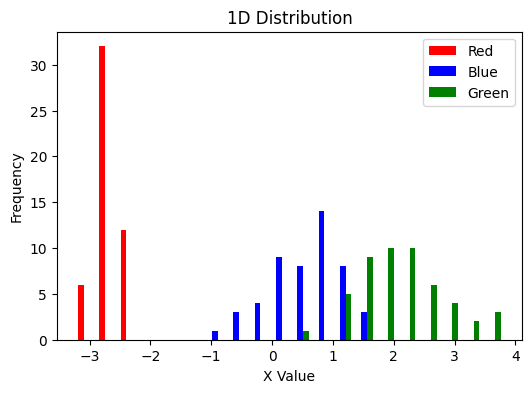

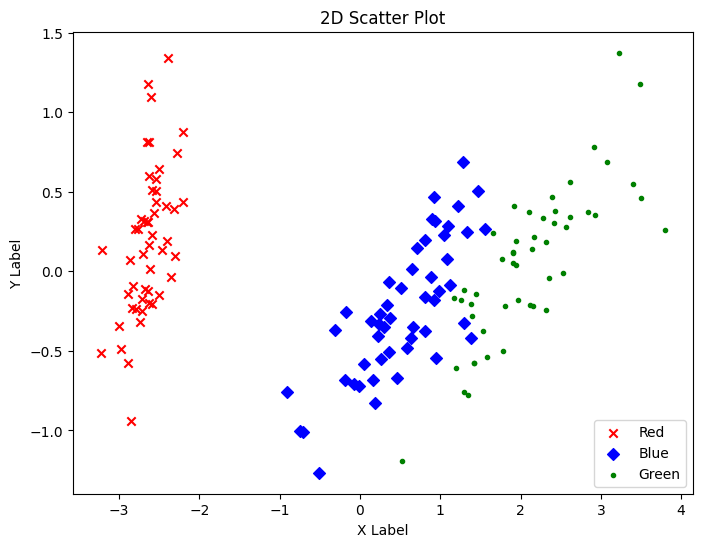

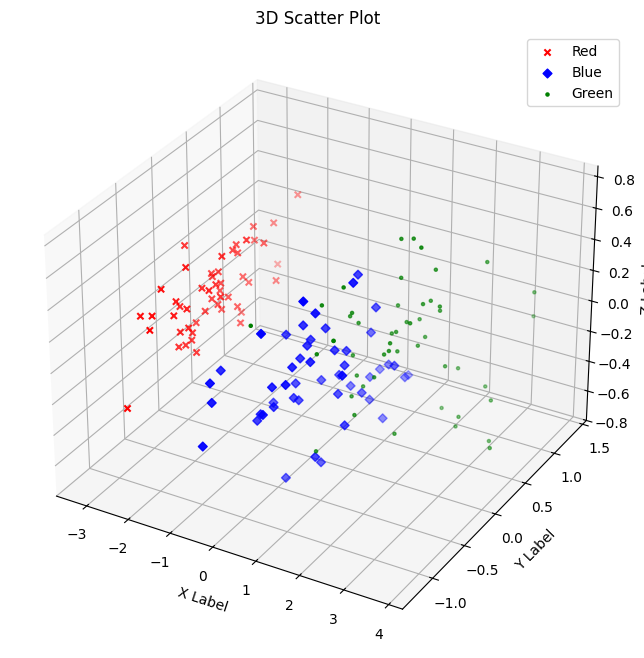

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

# 读取需要处理的数据集
data = load_iris()
y = data.target
x = data.data

#设置pca后得到的维度
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(x)

red_x,red_y, red_z=[],[],[]
blue_x,blue_y, blue_z=[],[],[]
green_x,green_y, green_z=[],[],[]
ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(ratio):
    print(f"PCA_{i+1}_ratio: {ratio}")

for i in range(len(reduced_data)):
    if y[i] ==0:
        red_x.append(reduced_data[i][0])
        red_y.append(reduced_data[i][1])
        red_z.append(reduced_data[i][2])
    elif y[i]==1:
        blue_x.append(reduced_data[i][0])
        blue_y.append(reduced_data[i][1])
        blue_z.append(reduced_data[i][2])
    else:
        green_x.append(reduced_data[i][0])
        green_y.append(reduced_data[i][1])
        green_z.append(reduced_data[i][2])

# plt.scatter用于绘制一维/二维图像
plt.figure(figsize=(6, 4))
plt.hist([red_x, blue_x, green_x], bins=20, label=['Red', 'Blue', 'Green'], color = ['r', 'b', 'g'])
plt.title('1D Distribution')
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, c='r', marker='x', label='Red')
plt.scatter(blue_x, blue_y, c='b', marker='D', label='Blue')
plt.scatter(green_x, green_y, c='g', marker='.', label='Green')
plt.title('2D Scatter Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.legend()
plt.savefig("Test_2D_plot.png")
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red_x, red_y, red_z, c='r', marker='x', label='Red')
ax.scatter(blue_x, blue_y, blue_z, c='b', marker='D', label='Blue')
ax.scatter(green_x, green_y, green_z, c='g', marker='.', label='Green')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.title('3D Scatter Plot')
plt.show()

# 层次分析法

In [25]:
import numpy as np

import numpy as np
class AHP:
    """
    相关信息的传入和准备
    """

    def __init__(self, array):
        ## 记录矩阵相关信息
        self.array = array
        ## 记录矩阵大小
        self.n = array.shape[0]
        # 初始化RI值，用于一致性检验
        self.RI_list = [0, 0, 0.52, 0.89, 1.12, 1.26, 1.36, 1.41, 1.46, 1.49, 1.52, 1.54, 1.56, 1.58, 1.59]
        # 矩阵的特征值和特征向量
        self.eig_val, self.eig_vector = np.linalg.eig(self.array)
        # 矩阵的最大特征值
        self.max_eig_val = np.max(self.eig_val)
        # 矩阵最大特征值对应的特征向量
        self.max_eig_vector = self.eig_vector[:, np.argmax(self.eig_val)].real
        # 矩阵的一致性指标CI
        self.CI_val = (self.max_eig_val - self.n) / (self.n - 1)
        # 矩阵的一致性比例CR
        self.CR_val = self.CI_val / (self.RI_list[self.n - 1])

    """
    一致性判断
    """

    def test_consist(self):
        # 打印矩阵的一致性指标CI和一致性比例CR
        print("判断矩阵的CI值为：" + str(self.CI_val))
        print("判断矩阵的CR值为：" + str(self.CR_val))
        # 进行一致性检验判断
        if self.n == 2:  # 当只有两个子因素的情况
            print("仅包含两个子因素，不存在一致性问题")
        else:
            if self.CR_val < 0.1:  # CR值小于0.1，可以通过一致性检验
                print("判断矩阵的CR值为" + str(self.CR_val) + ",通过一致性检验")
                return True
            else:  # CR值大于0.1, 一致性检验不通过
                print("判断矩阵的CR值为" + str(self.CR_val) + "未通过一致性检验")
                return False

    """
    算术平均法求权重
    """

    def cal_weight_by_arithmetic_method(self):
        # 求矩阵的每列的和
        col_sum = np.sum(self.array, axis=0)
        # 将判断矩阵按照列归一化
        array_normed = self.array / col_sum
        # 计算权重向量
        array_weight = np.sum(array_normed, axis=1) / self.n
        # 打印权重向量
        print("算术平均法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight

    """
    几何平均法求权重
    """

    def cal_weight__by_geometric_method(self):
        # 求矩阵的每列的积
        col_product = np.prod(self.array, axis=1)
        # 将得到的积向量的每个分量进行开n次方
        array_power = np.power(col_product, 1 / self.n)
        # 将列向量归一化
        array_weight = array_power / np.sum(array_power)
        # 打印权重向量
        print("几何平均法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight

    """
    特征值法求权重
    """

    def cal_weight__by_eigenvalue_method(self):
        # 将矩阵最大特征值对应的特征向量进行归一化处理就得到了权重
        array_weight = self.max_eig_vector / np.sum(self.max_eig_vector)
        # 打印权重向量
        print("特征值法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight


if __name__ == "__main__":
    # 判断矩阵
    b = np.array([[1, 1/3, 1/5, 1/4],  # 价格 vs (价格, 性能, 品牌, 外观)
                  [3, 1, 1/3, 1/2],    # 性能 vs (价格, 性能, 品牌, 外观)
                  [5, 3, 1, 2],        # 品牌 vs (价格, 性能, 品牌, 外观)
                  [4, 2, 1/2, 1]])     # 外观 vs (价格, 性能, 品牌, 外观)
    
    # 方案层的成对比较矩阵（3种手机）
    price_matrix = np.array([
        [1, 2, 3],
        [1/2, 1, 2],
        [1/3, 1/2, 1]
    ])
    
    performance_matrix = np.array([
        [1, 1/3, 1/4],
        [3, 1, 1/2],
        [4, 2, 1]
    ])
    
    brand_matrix = np.array([
        [1, 1/2, 1/3],
        [2, 1, 1/2],
        [3, 2, 1]
    ])
    
    appearance_matrix = np.array([
        [1, 2, 1/3],
        [1/2, 1, 1/4],
        [3, 4, 1]
    ])

    # 算术平均法求权重
    weight1 = AHP(b).cal_weight_by_arithmetic_method()
    # 几何平均法求权重
    weight2 = AHP(b).cal_weight__by_geometric_method()
    # 特征值法求权重
    weight3 = AHP(b).cal_weight__by_eigenvalue_method()


算术平均法计算得到的权重向量为：
 [0.07364549 0.17148293 0.47085905 0.28401252]
几何平均法计算得到的权重向量为：
 [0.07251694 0.16971481 0.47234309 0.28542516]
特征值法计算得到的权重向量为：
 [0.07285893 0.16990098 0.472862   0.28437808]


# 绘制箱型图

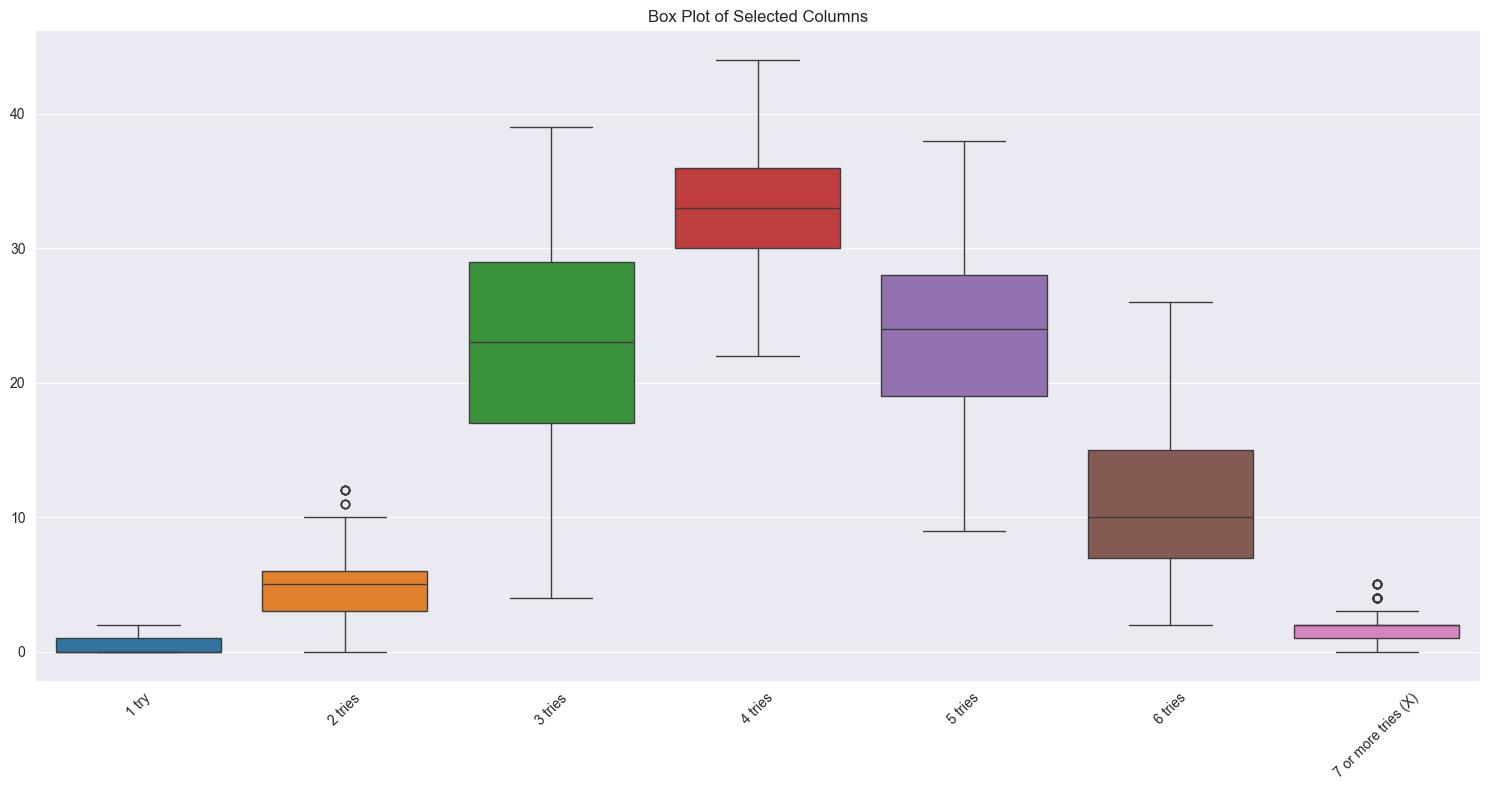

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '版本3_缺失值处理_Problem_C_Data_Wordle_副本2.xlsx'
data = pd.read_excel(file_path)
columns_to_plot = ['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']

filtered_data = data[columns_to_plot]
plt.figure(figsize=(15, 8))  # 根据需要调整图表大小
sns.boxplot(data=filtered_data)  # 使用seaborn绘制箱型图
plt.title('Box Plot of Selected Columns')
plt.xticks(rotation=45)  # 旋转x轴标签以提高可读性
plt.tight_layout()  # 自动调整子图参数,使之填充整个图像区域
plt.show()

# 直方图

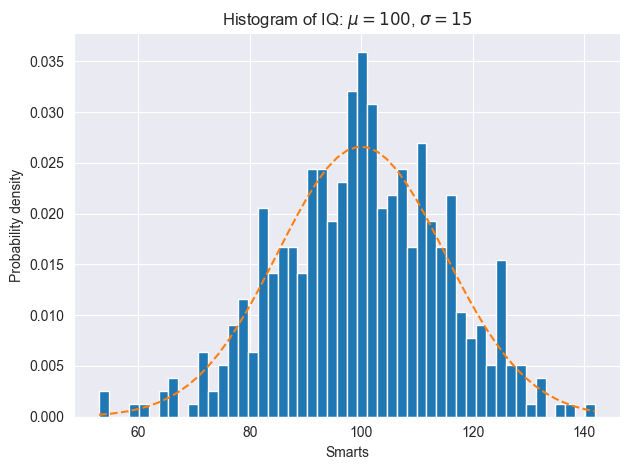

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


# 流向图

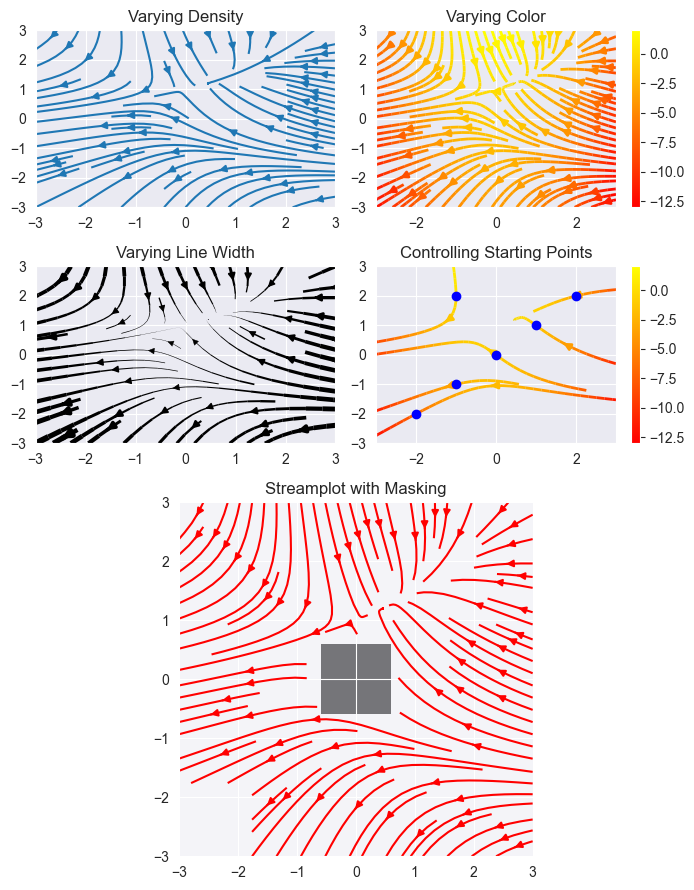

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()


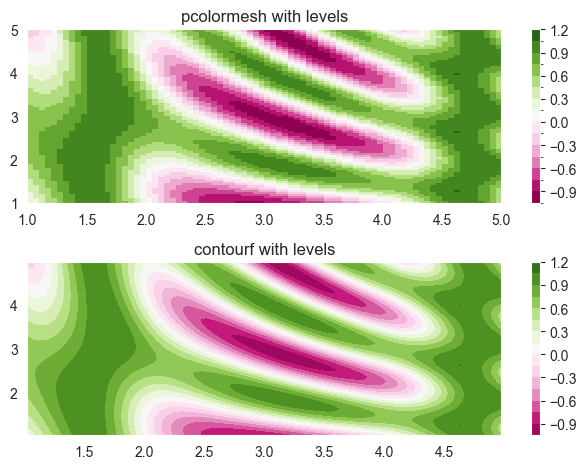

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

